In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [5]:
from sklearn.metrics import classification_report, confusion_matrix


In [6]:
from sklearn.model_selection import GridSearchCV # when accurancy low in that time we use GridSearchCV library so accurany will increase

In [10]:
kyphosis_df = pd.read_csv(r"D:\Excel_File\kyphosis.csv")

In [11]:
kyphosis_df

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15
...,...,...,...,...
76,present,157,3,13
77,absent,26,7,13
78,absent,120,2,13
79,present,42,7,6


In [12]:
kyphosis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Kyphosis  81 non-null     object
 1   Age       81 non-null     int64 
 2   Number    81 non-null     int64 
 3   Start     81 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [13]:
kyphosis_df.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


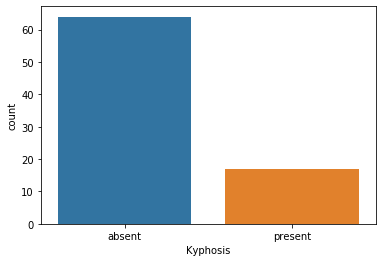

In [14]:
sns.countplot(x='Kyphosis', data=kyphosis_df, label='count')

In [15]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [16]:
le_y = LabelEncoder()

In [17]:
kyphosis_df['Kyphosis'] = le_y.fit_transform(kyphosis_df['Kyphosis'])

In [18]:
kyphosis_df.head()

,Kyphosis,Age,Number,Start
0,0,71,3,5
1,0,158,3,14
2,1,128,4,5
3,0,2,5,1
4,0,1,4,15


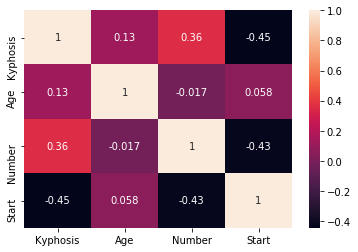

In [19]:
sns.heatmap(kyphosis_df.corr(), annot=True, fmt='.2g')

In [20]:
X = kyphosis_df.drop(['Kyphosis'], axis=1)

y = kyphosis_df['Kyphosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [22]:
dt_classifier = DecisionTreeClassifier()

In [23]:
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [24]:
y_pred = dt_classifier.predict(X_test)

In [25]:
confusion_matrix(y_test, y_pred)

array([[16,  2],
       [ 5,  2]], dtype=int64)

In [26]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.89      0.82        18
           1       0.50      0.29      0.36         7

    accuracy                           0.72        25
   macro avg       0.63      0.59      0.59        25
weighted avg       0.69      0.72      0.69        25



In [27]:
rf_classifier = RandomForestClassifier()

In [28]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [29]:
y_pred = rf_classifier.predict(X_test)

In [30]:
confusion_matrix(y_test, y_pred)

array([[17,  1],
       [ 4,  3]], dtype=int64)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87        18
           1       0.75      0.43      0.55         7

    accuracy                           0.80        25
   macro avg       0.78      0.69      0.71        25
weighted avg       0.79      0.80      0.78        25



In [32]:
param_grid = {'n_estimators':list(range(300, 350))}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, refit=True, verbose=4)

In [33]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=300, score=0.833, total=   0.8s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s


[CV] .................... n_estimators=300, score=0.818, total=   0.8s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.5s remaining:    0.0s


[CV] .................... n_estimators=300, score=0.818, total=   0.8s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    2.3s remaining:    0.0s


[CV] .................... n_estimators=300, score=0.818, total=   0.8s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.727, total=   0.9s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.833, total=   0.9s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.818, total=   1.2s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.818, total=   0.8s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.818, total=   0.4s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.727, total=   0.5s
[CV] n_estimators=302 ................................................
[CV] .

[CV] .................... n_estimators=312, score=0.818, total=   0.9s
[CV] n_estimators=312 ................................................
[CV] .................... n_estimators=312, score=0.818, total=   0.9s
[CV] n_estimators=312 ................................................
[CV] .................... n_estimators=312, score=0.727, total=   1.2s
[CV] n_estimators=312 ................................................
[CV] .................... n_estimators=312, score=0.818, total=   1.3s
[CV] n_estimators=313 ................................................
[CV] .................... n_estimators=313, score=0.833, total=   0.4s
[CV] n_estimators=313 ................................................
[CV] .................... n_estimators=313, score=0.818, total=   0.5s
[CV] n_estimators=313 ................................................
[CV] .................... n_estimators=313, score=0.818, total=   0.4s
[CV] n_estimators=313 ................................................
[CV] .

[CV] .................... n_estimators=323, score=0.818, total=   1.4s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.833, total=   0.9s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.818, total=   0.4s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.818, total=   0.5s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.818, total=   0.5s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.818, total=   0.9s
[CV] n_estimators=325 ................................................
[CV] .................... n_estimators=325, score=0.833, total=   1.0s
[CV] n_estimators=325 ................................................
[CV] .

[CV] .................... n_estimators=335, score=0.818, total=   0.5s
[CV] n_estimators=335 ................................................
[CV] .................... n_estimators=335, score=0.727, total=   0.5s
[CV] n_estimators=335 ................................................
[CV] .................... n_estimators=335, score=0.818, total=   0.9s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.833, total=   1.0s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.818, total=   0.9s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.818, total=   0.9s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.727, total=   1.0s
[CV] n_estimators=336 ................................................
[CV] .

[CV] .................... n_estimators=347, score=0.833, total=   1.0s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.818, total=   1.0s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.818, total=   1.0s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.727, total=   1.0s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.727, total=   1.0s
[CV] n_estimators=348 ................................................
[CV] .................... n_estimators=348, score=0.833, total=   1.0s
[CV] n_estimators=348 ................................................
[CV] .................... n_estimators=348, score=0.909, total=   1.0s
[CV] n_estimators=348 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  3.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [34]:
grid.best_params_

{'n_estimators': 334}

In [35]:
y_pred = grid.predict(X_test)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25



# or

In [37]:
rfc=RandomForestClassifier(random_state=42)


In [38]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}


In [41]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)


In [43]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .................... n_estimators=300, score=0.833, total=   0.3s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .................... n_estimators=300, score=0.818, total=   0.3s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.5s remaining:    0.0s


[CV] .................... n_estimators=300, score=0.818, total=   0.3s
[CV] n_estimators=300 ................................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.8s remaining:    0.0s


[CV] .................... n_estimators=300, score=0.818, total=   0.3s
[CV] n_estimators=300 ................................................
[CV] .................... n_estimators=300, score=0.727, total=   0.3s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.833, total=   0.3s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.818, total=   0.3s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.818, total=   0.3s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.727, total=   0.3s
[CV] n_estimators=301 ................................................
[CV] .................... n_estimators=301, score=0.727, total=   0.3s
[CV] n_estimators=302 ................................................
[CV] .

[CV] .................... n_estimators=312, score=0.818, total=   0.3s
[CV] n_estimators=312 ................................................
[CV] .................... n_estimators=312, score=0.818, total=   0.3s
[CV] n_estimators=312 ................................................
[CV] .................... n_estimators=312, score=0.727, total=   0.3s
[CV] n_estimators=312 ................................................
[CV] .................... n_estimators=312, score=0.727, total=   0.3s
[CV] n_estimators=313 ................................................
[CV] .................... n_estimators=313, score=0.833, total=   0.3s
[CV] n_estimators=313 ................................................
[CV] .................... n_estimators=313, score=0.818, total=   0.3s
[CV] n_estimators=313 ................................................
[CV] .................... n_estimators=313, score=0.818, total=   0.3s
[CV] n_estimators=313 ................................................
[CV] .

[CV] .................... n_estimators=323, score=0.818, total=   0.3s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.833, total=   0.3s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.818, total=   0.3s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.818, total=   0.3s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.727, total=   0.3s
[CV] n_estimators=324 ................................................
[CV] .................... n_estimators=324, score=0.727, total=   0.3s
[CV] n_estimators=325 ................................................
[CV] .................... n_estimators=325, score=0.833, total=   0.3s
[CV] n_estimators=325 ................................................
[CV] .

[CV] .................... n_estimators=335, score=0.818, total=   0.3s
[CV] n_estimators=335 ................................................
[CV] .................... n_estimators=335, score=0.727, total=   0.3s
[CV] n_estimators=335 ................................................
[CV] .................... n_estimators=335, score=0.818, total=   0.3s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.833, total=   0.3s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.909, total=   0.3s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.818, total=   0.3s
[CV] n_estimators=336 ................................................
[CV] .................... n_estimators=336, score=0.727, total=   0.3s
[CV] n_estimators=336 ................................................
[CV] .

[CV] .................... n_estimators=347, score=0.833, total=   0.3s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.818, total=   0.3s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.818, total=   0.3s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.818, total=   0.3s
[CV] n_estimators=347 ................................................
[CV] .................... n_estimators=347, score=0.818, total=   0.3s
[CV] n_estimators=348 ................................................
[CV] .................... n_estimators=348, score=0.833, total=   0.3s
[CV] n_estimators=348 ................................................
[CV] .................... n_estimators=348, score=0.818, total=   0.3s
[CV] n_estimators=348 ................................................
[CV] .

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:  1.4min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [45]:
grid.best_params_

{'n_estimators': 315}

In [46]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.94      0.83        18
           1       0.50      0.14      0.22         7

    accuracy                           0.72        25
   macro avg       0.62      0.54      0.53        25
weighted avg       0.67      0.72      0.66        25

